In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [8]:
df = pd.read_csv('myexcel.csv')
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,06-Feb,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,06-Apr,220,Oklahoma State,3431040.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [14]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [25]:
# Fill missing values in 'College' with "Unknown"
df['College'] = df['College'].fillna("Unknown")

#Fill with the mean or median salary
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [28]:
#checking duplicate valeus

df.duplicated().sum()

0

Task 1: Distribution of Employees across Teams

In [42]:
team_counts = df['Team'].value_counts()
team_percentages = (team_counts / df.shape[0]) * 100


print("Team Counts:\n", team_counts)
print("\nTeam Percentages:\n", team_percentages)

Team Counts:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentages:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies        

Visualization for Task 1

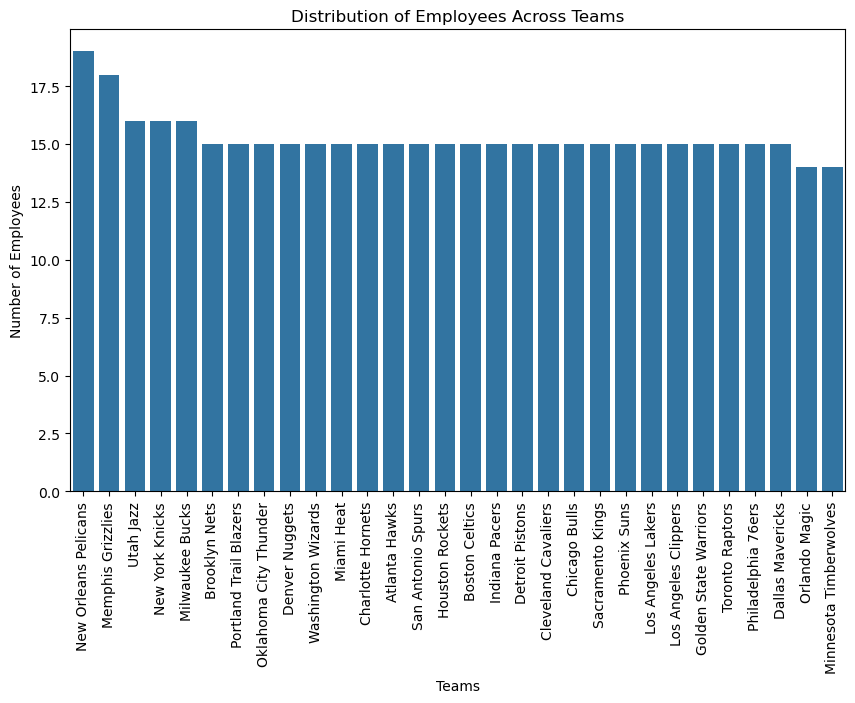

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title("Distribution of Employees Across Teams")
plt.ylabel("Number of Employees")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.show()

Task 2: Segregate Employees Based on Position

In [46]:
position_counts = df['Position'].value_counts()
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

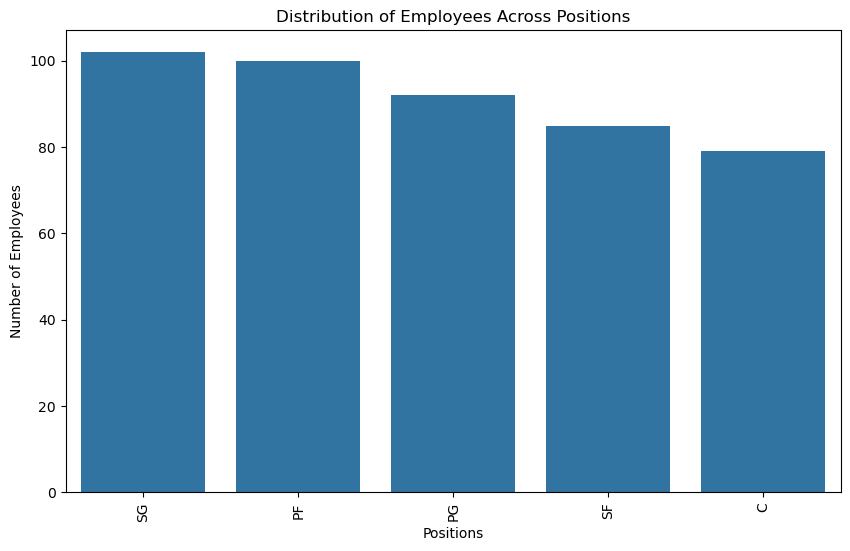

In [48]:
# Visualization for Task 2
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title("Distribution of Employees Across Positions")
plt.ylabel("Number of Employees")
plt.xlabel("Positions")
plt.xticks(rotation=90)
plt.show()

3.  Identify the predominant age group among employees. (2 marks)

In [52]:
age_groups = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40, 45], labels=['20-25', '25-30', '30-35', '35-40', '40-45'])
age_group_counts = age_groups.value_counts().sort_index()
print(age_group_counts)

Age
20-25    179
25-30    167
30-35     68
35-40     23
40-45      0
Name: count, dtype: int64


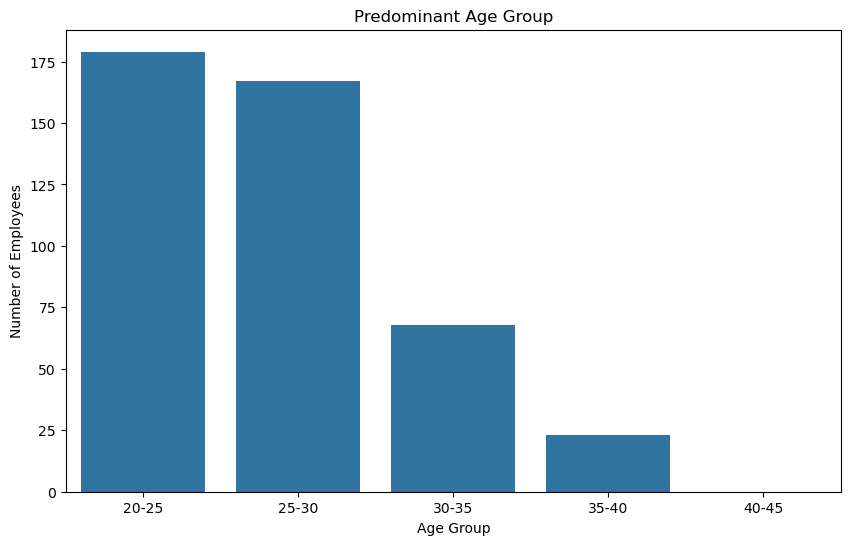

In [54]:
# Visualization for Task 3
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Predominant Age Group")
plt.ylabel("Number of Employees")
plt.xlabel("Age Group")
plt.show()

4.  Discover which team and position have the highest salary expenditure. (2 marks)

In [56]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
highest_team_salary = team_salary.idxmax()
highest_position_salary = position_salary.idxmax()

In [62]:
print("highest_team_salary:\n",highest_team_salary)
print("\nhighest_position_salary:\n",highest_position_salary)

highest_team_salary:
 Cleveland Cavaliers

highest_position_salary:
 C


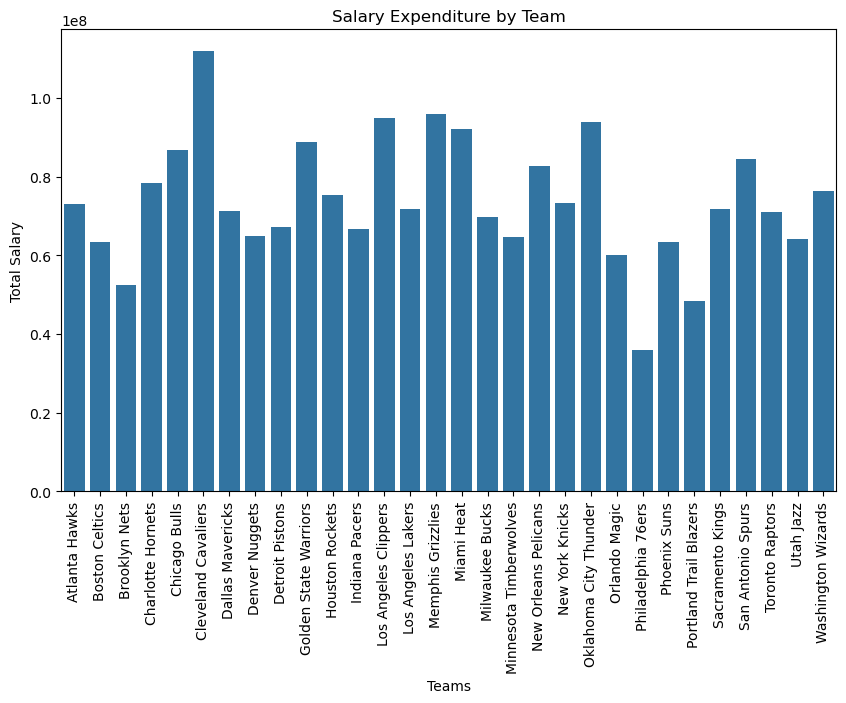

In [64]:
# Visualization for Task 4
plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title("Salary Expenditure by Team")
plt.ylabel("Total Salary")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.show()

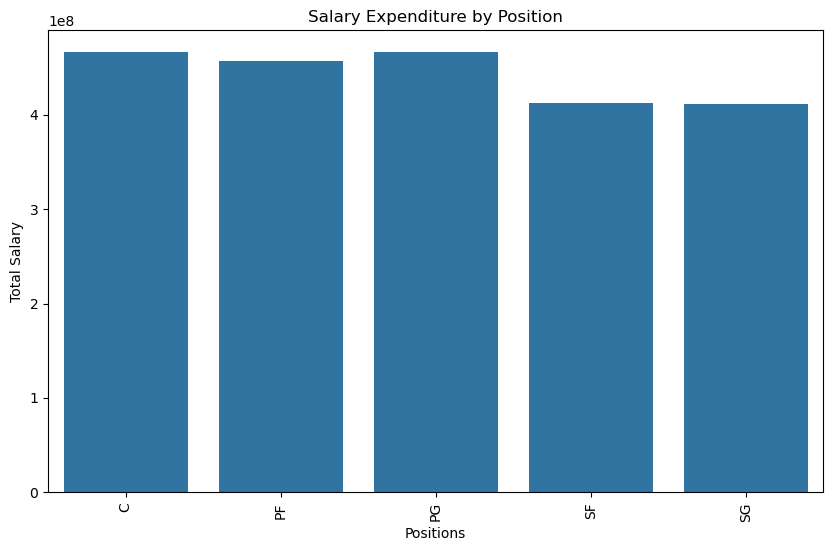

In [66]:
#Salary Expenditure by Position
plt.figure(figsize=(10, 6))
sns.barplot(x=position_salary.index, y=position_salary.values)
plt.title("Salary Expenditure by Position")
plt.ylabel("Total Salary")
plt.xlabel("Positions")
plt.xticks(rotation=90)
plt.show()

5.  Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

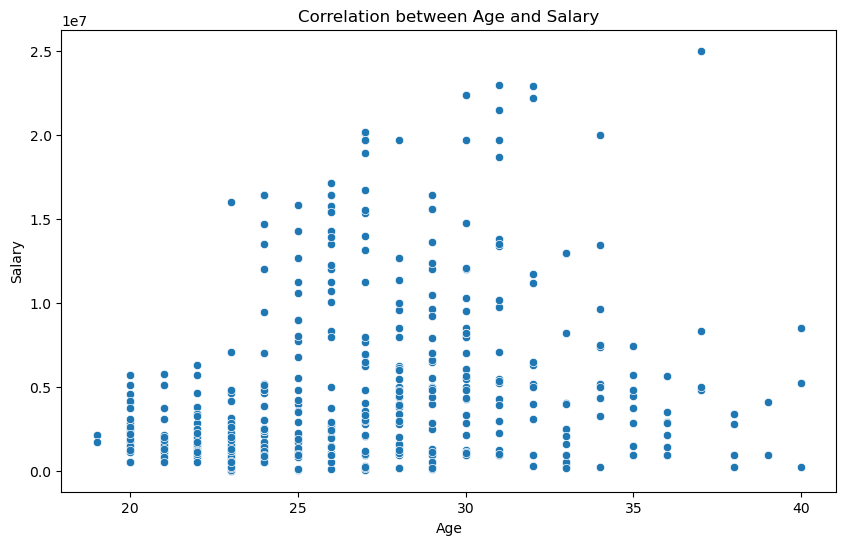

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()